# MLP in Tensorflow with Best Hyperparameters

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.math import argmax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import wandb
from wandb.keras import WandbCallback
from matplotlib import pyplot as plt
from pprint import pprint

## Login to Wandb

In [2]:
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Load best hyperparameters

In [3]:
api = wandb.Api()
sweep = api.sweep("nsiete23/tf_mlp/sweeps/ez31t9fh")

best_config = sweep.best_run().config
pprint(best_config)

wandb: Sorting runs by +summary_metrics.val_loss


{'batch_size': 128,
 'dense_1': 359,
 'dense_2': 179,
 'dense_3': 137,
 'dense_4': 64,
 'epochs': 20,
 'learning_rate': 0.058011500502312935,
 'momentum': 0.04032910145774373}


## Define training functions

In [4]:
def create_model(config):
    model = Sequential([
        Rescaling(scale=1./255, input_shape=(28, 28)),
        Flatten(),
        
        Dense(config.dense_1, activation='relu'),
        Dense(config.dense_2, activation='relu'),
        Dense(config.dense_3, activation='relu'),
        Dense(config.dense_4, activation='relu'),

        Dense(10, activation='softmax'),
    ])

    return model

In [5]:
def compile_model(model, config):
    model.compile(
        optimizer=SGD(learning_rate=config.learning_rate, momentum=config.momentum),
        loss=SparseCategoricalCrossentropy(),
        metrics=[SparseCategoricalAccuracy()]
    )

In [6]:
def train_model(model, config, x_train, y_train):
    history = model.fit(
        x_train,
        y_train,
        epochs=config.epochs,
        validation_split=0.2,
        batch_size=config.batch_size,
        shuffle=True,
        callbacks=[
            WandbCallback()
        ]
    )

    return history

## Load dataset and train

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
wandb.init(config=best_config, project='tf_mlp', name='best-mlp-tf')

config = wandb.config

mlp = create_model(config)
mlp.summary()
compile_model(mlp, config)
history = train_model(mlp, config, x_train, y_train)

wandb.finish()

4422102/4422102 [==============================] - 0s 0us/step


wandb: Currently logged in as: v-modroczky (nsiete23). Use `wandb login --relogin` to force relogin


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 359)               281815    
                                                                 
 dense_1 (Dense)             (None, 179)               64440     
                                                                 
 dense_2 (Dense)             (None, 137)               24660     
                                                                 
 dense_3 (Dense)             (None, 64)                8832      
                                                                 
 dense_4 (Dense)             (None, 10)                6

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
364/375 [============================>.] - ETA: 0s - loss: 0.7778 - sparse_categorical_accuracy: 0.7278

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 5s 8ms/step - loss: 0.7699 - sparse_categorical_accuracy: 0.7304 - val_loss: 0.4995 - val_sparse_categorical_accuracy: 0.8231
Epoch 2/20
355/375 [===========================>..] - ETA: 0s - loss: 0.4815 - sparse_categorical_accuracy: 0.8285

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.4787 - sparse_categorical_accuracy: 0.8293 - val_loss: 0.4488 - val_sparse_categorical_accuracy: 0.8397
Epoch 3/20
373/375 [============================>.] - ETA: 0s - loss: 0.4191 - sparse_categorical_accuracy: 0.8494

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 4s 10ms/step - loss: 0.4187 - sparse_categorical_accuracy: 0.8495 - val_loss: 0.4324 - val_sparse_categorical_accuracy: 0.8395
Epoch 4/20
358/375 [===========================>..] - ETA: 0s - loss: 0.3882 - sparse_categorical_accuracy: 0.8583

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3863 - sparse_categorical_accuracy: 0.8590 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.8618
Epoch 5/20
374/375 [============================>.] - ETA: 0s - loss: 0.3599 - sparse_categorical_accuracy: 0.8674

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3600 - sparse_categorical_accuracy: 0.8674 - val_loss: 0.3646 - val_sparse_categorical_accuracy: 0.8679
Epoch 6/20
374/375 [============================>.] - ETA: 0s - loss: 0.3439 - sparse_categorical_accuracy: 0.8734

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 9ms/step - loss: 0.3443 - sparse_categorical_accuracy: 0.8733 - val_loss: 0.3464 - val_sparse_categorical_accuracy: 0.8747
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3252 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.3569 - val_sparse_categorical_accuracy: 0.8712
Epoch 8/20
364/375 [============================>.] - ETA: 0s - loss: 0.3154 - sparse_categorical_accuracy: 0.8840

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 2s 7ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8836 - val_loss: 0.3441 - val_sparse_categorical_accuracy: 0.8736
Epoch 9/20
361/375 [===========================>..] - ETA: 0s - loss: 0.3017 - sparse_categorical_accuracy: 0.8871

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.3023 - sparse_categorical_accuracy: 0.8869 - val_loss: 0.3357 - val_sparse_categorical_accuracy: 0.8777
Epoch 10/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2906 - sparse_categorical_accuracy: 0.8923 - val_loss: 0.3658 - val_sparse_categorical_accuracy: 0.8640
Epoch 11/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - sparse_categorical_accuracy: 0.8947 - val_loss: 0.4044 - val_sparse_categorical_accuracy: 0.8415
Epoch 12/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2734 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.3431 - val_sparse_categorical_accuracy: 0.8698
Epoch 13/20
374/375 [============================>.] - ETA: 0s - loss: 0.2662 - sparse_categorical_accuracy: 0.9002

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.2661 - sparse_categorical_accuracy: 0.9003 - val_loss: 0.3033 - val_sparse_categorical_accuracy: 0.8879
Epoch 14/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2565 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.3227 - val_sparse_categorical_accuracy: 0.8805
Epoch 15/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2481 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.3368 - val_sparse_categorical_accuracy: 0.8802
Epoch 16/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2413 - sparse_categorical_accuracy: 0.9107 - val_loss: 0.3121 - val_sparse_categorical_accuracy: 0.8870
Epoch 17/20
373/375 [============================>.] - ETA: 0s - loss: 0.2358 - sparse_categorical_accuracy: 0.9106

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230227_161519-howqly4h/files/model-best)... Done. 0.1s


375/375 [==============================] - 3s 7ms/step - loss: 0.2357 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.8900
Epoch 18/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2276 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.3019 - val_sparse_categorical_accuracy: 0.8918
Epoch 19/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9170 - val_loss: 0.3234 - val_sparse_categorical_accuracy: 0.8788
Epoch 20/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2149 - sparse_categorical_accuracy: 0.9199 - val_loss: 0.3024 - val_sparse_categorical_accuracy: 0.8917


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
sparse_categorical_accuracy,▁▅▅▆▆▆▇▇▇▇▇▇▇▇██████
val_loss,█▆▆▄▃▃▃▃▂▃▅▃▁▂▂▂▁▁▂▁
val_sparse_categorical_accuracy,▁▃▃▅▆▆▆▆▇▅▃▆█▇▇███▇█
best_epoch,16
best_val_loss,0.2962
epoch,19
loss,0.21492
sparse_categorical_accuracy,0.9199
val_loss,0.30239


## Plot training and validation accuracy and loss

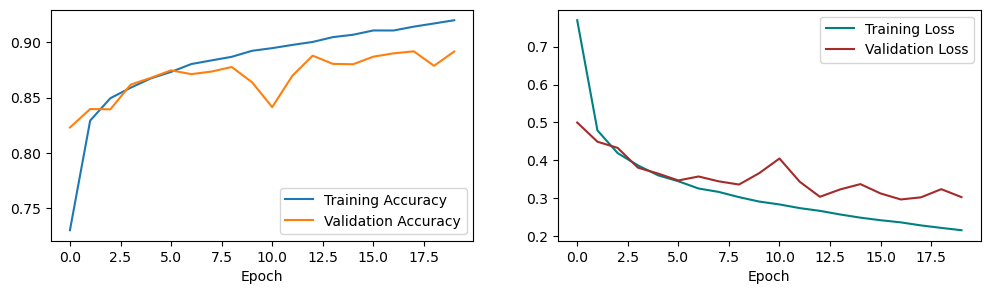

In [8]:
plt.subplots(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='teal')
plt.plot(history.history['val_loss'], label='Validation Loss', color='brown')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Define class names

In [9]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Run classification evaluation

In [10]:
y_pred = argmax(mlp.predict(x_test), axis = 1)
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top     0.8785    0.7810    0.8269      1000
     Trouser     0.9959    0.9650    0.9802      1000
    Pullover     0.7758    0.7960    0.7858      1000
       Dress     0.8913    0.8860    0.8887      1000
        Coat     0.8159    0.8110    0.8134      1000
      Sandal     0.9558    0.9720    0.9638      1000
       Shirt     0.6735    0.7510    0.7102      1000
     Sneaker     0.9275    0.9590    0.9430      1000
         Bag     0.9691    0.9710    0.9700      1000
  Ankle boot     0.9771    0.9380    0.9571      1000

    accuracy                         0.8830     10000
   macro avg     0.8860    0.8830    0.8839     10000
weighted avg     0.8860    0.8830    0.8839     10000



## Visualize confusion matrix

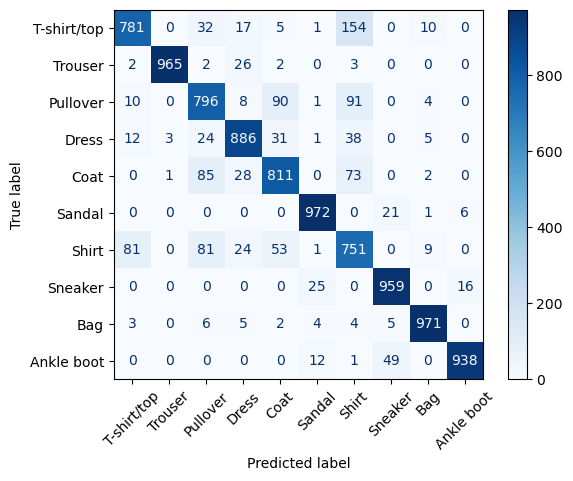

In [11]:
matrix = confusion_matrix(y_test, y_pred)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=class_names)
matrix_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)